In [4]:
import pandas as pd
data=pd.read_csv('Breast_Cancer.csv')

In [5]:
missing_values=data.isnull().sum()
print("missing values are : ")
print(missing_values)

missing values are : 
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [7]:
data_encoded=pd.get_dummies(data,drop_first=True)
print(data_encoded.head())
print(data_encoded.columns)

   Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0   68           4                      24                      1   
1   50          35                      14                      5   
2   58          63                      14                      7   
3   58          18                       2                      1   
4   47          41                       3                      1   

   Survival Months  Race_Other  Race_White  Marital Status_Married  \
0               60       False        True                    True   
1               62       False        True                    True   
2               75       False        True                   False   
3               84       False        True                    True   
4               50       False        True                    True   

   Marital Status_Separated  Marital Status_Single   ...  \
0                     False                   False  ...   
1                     False                 

In [11]:
y=data_encoded['Status_Dead']
x=data_encoded.drop('Status_Dead',axis=1)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',random_state=42)
model.fit(x_train,y_train)
print("Decision tree model has been trained successfully")

Decision tree model has been trained successfully


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

validation_accuracy=[]
training_accuracy=[]

depths=range(1,21)

for depth in depths:
    model=DecisionTreeClassifier(criterion='gini',max_depth=depth,random_state=42)
    model.fit(x_train,y_train)
    train_preds=model.predict(x_train)
    training_accuracy.append(accuracy_score(y_train,train_preds))
    val_preds=model.predict(x_test)
    validation_accuracy.append(accuracy_score(y_test,val_preds))

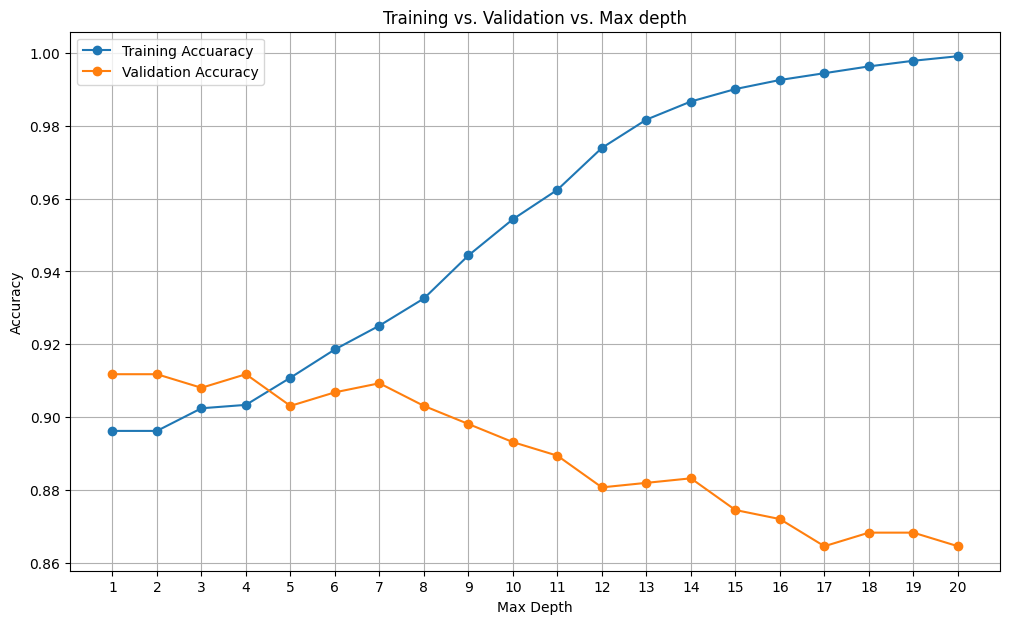

In [22]:
plt.figure(figsize=(12,7))
plt.plot(depths,training_accuracy,marker="o",label="Training Accuaracy")
plt.plot(depths,validation_accuracy,marker="o",label="Validation Accuracy")
plt.title('Training vs. Validation vs. Max depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()
